<a href="https://colab.research.google.com/github/Paymanshus/DL_Sem_VI/blob/main/Exp2/DL_Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the Neural Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import KFold

from keras import layers
from keras import models
from keras import optimizers

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import keras.optimizers

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# normalize to range 0-1
X_train, X_test = X_train/255.0, X_test/255.0

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
opt = Adam()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizers.Adam(), metrics=['accuracy'])

NameError: ignored

In [ ]:
history = mnistnn.fit(x=X_train, y=y_train,
                      epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 1.1065 - accuracy: 0.7245 - val_loss: 0.3729 - val_accuracy: 0.8997
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8976 - val_loss: 0.3020 - val_accuracy: 0.9143
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.9140 - val_loss: 0.2708 - val_accuracy: 0.9246
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9242 - val_loss: 0.2484 - val_accuracy: 0.9307
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9279 - val_loss: 0.2323 - val_accuracy: 0.9337
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2303 - accuracy: 0.9363 - val_loss: 0.2163 - val_accuracy: 0.9398
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2199 - accuracy: 0.9391 - val_loss: 0.2062 - val_accuracy:

### Model Preparation

In [ ]:
# Callbacks

es = EarlyStopping(monitor='val_loss', min_delta=0.0005, patience=6)
mc = ModelCheckpoint('best_weights.h5', monitor='val_loss', save_best_only=True, mode='max')
rd = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, mode='auto')

In [ ]:
# Modelling the CNN

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters=96, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.15))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(10, activation='softmax'))

In [ ]:
optimizer = optimizers.Adam()

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 3, 96)          3

In [ ]:
hist = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc, rd], validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 101s 67ms/step - loss: 0.2914 - accuracy: 0.9086 - val_loss: 0.0845 - val_accuracy: 0.9758
Epoch 2/100
1500/1500 [==============================] - 100s 67ms/step - loss: 0.0604 - accuracy: 0.9836 - val_loss: 0.0531 - val_accuracy: 0.9857
Epoch 3/100
1500/1500 [==============================] - 101s 68ms/step - loss: 0.0480 - accuracy: 0.9868 - val_loss: 0.0737 - val_accuracy: 0.9796
Epoch 4/100
1500/1500 [==============================] - 101s 67ms/step - loss: 0.0360 - accuracy: 0.9905 - val_loss: 0.0636 - val_accuracy: 0.9843
Epoch 5/100
1500/1500 [==============================] - 100s 67ms/step - loss: 0.0318 - accuracy: 0.9916 - val_loss: 0.0491 - val_accuracy: 0.9883
Epoch 6/100
1500/1500 [==============================] - 101s 67ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0469 - val_accuracy: 0.9880
Epoch 7/100
1500/1500 [==============================] - 101s 67ms/step - loss: 0.0262 - accuracy: 0.9925 - val_

In [ ]:
pred = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0461 - accuracy: 0.9949


### Model Evaluation

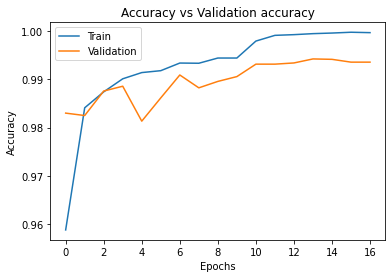

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Validation accuracy')
plt.legend(['Train','Validation'])
plt.show()

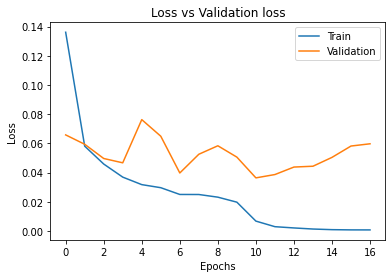

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Validation loss')
plt.legend(['Train','Validation'])
plt.show()

In [ ]:
model.save('mnistnn.h5', save_format='h5')

In [ ]:
from keras.models import load_model

newmodel = load_model('mnistnn.h5')

In [ ]:
ypred = model.predict_classes(X_test)
ypred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

#Deployment

In [ ]:
!pip install flask gevent requests pillow

     |████████████████████████████████| 5.6MB 10.7MB/s 
     |████████████████████████████████| 256kB 42.5MB/s 


Creat a file ProcFile

In [ ]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

#Install flask and ngrok

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

#Webpage

In [ ]:
a = '''
<!doctype html>
<html lang="en">
<head>
</head> 
  <body>
 
          <h2>Image Recognition Server</h2>
       
      <form action="" method=post enctype=multipart/form-data>
        <input type=file name=file>
        <input type=submit value=Upload>
    </form>
    {{label}}  
     
  </body>
  </html>
  '''

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

Html_file = open("/content/templates/index.html", "w")
Html_file.write(a)
Html_file.close()

mkdir: cannot create directory ‘/content/templates’: File exists
mkdir: cannot create directory ‘/content/uploads’: File exists


#Deploy model

In [ ]:
import os
from flask import Flask, render_template, request
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array

app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOADS'] = 'uploads'


def load_mymodel():
    global mymodel
    mymodel = load_model('mnistnn.h5')

@app.route('/')
def home():
    return render_template('index.html')

def predictions(file):
    img = image.load_img(file, target_size=(28,28), color_mode="grayscale")
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    ans = mymodel.predict_classes(img)
    return ans


@app.route('/', methods=['POST'])
def upload_files():
    file = request.files['file']
    filepath = os.path.join(app.config['UPLOADS'], file.filename)
    file.save(filepath)
    output = predictions(filepath)
    return render_template('index.html', label=output)



if __name__=='__main__':
    load_mymodel()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://18524caef5ff.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [01/Apr/2021 06:57:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Apr/2021 06:57:14] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [01/Apr/2021 06:57:15] "GET / HTTP/1.1" 200 -
